## Task 2 EDA

#### Loading the library

In [1]:
# import Pkg; Pkg.add("")

In [2]:
using DataFrames
using UrlDownload
using DataFramesMeta
using Statistics
using DataSkimmer
using CSV
using Pkg
using Plots
using Gadfly
using FreqTables
using StatsBase
using Dates
using Pipe

#### Loading the Data

In [3]:
trainingData = DataFrame(urldownload("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv"))

pricingData = DataFrame(urldownload("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv"))

,id,price_date,price_off_peak_var,price_peak_var
,String,Date,Float64,Float64
1,038af19179925da21a25619c5a24b745,"Date(""2015-01-01"")",0.151367,0.0
2,038af19179925da21a25619c5a24b745,"Date(""2015-02-01"")",0.151367,0.0
3,038af19179925da21a25619c5a24b745,"Date(""2015-03-01"")",0.151367,0.0
4,038af19179925da21a25619c5a24b745,"Date(""2015-04-01"")",0.149626,0.0
5,038af19179925da21a25619c5a24b745,"Date(""2015-05-01"")",0.149626,0.0
6,038af19179925da21a25619c5a24b745,"Date(""2015-06-01"")",0.149626,0.0
7,038af19179925da21a25619c5a24b745,"Date(""2015-07-01"")",0.150321,0.0
8,038af19179925da21a25619c5a24b745,"Date(""2015-08-01"")",0.145859,0.0
9,038af19179925da21a25619c5a24b745,"Date(""2015-09-01"")",0.145859,0.0


In [4]:
describe(trainingData)

,variable,mean,min,median
,Symbol,Union…,Any,Any
1,id,,0002203ffbb812588b632b9e628cc38d,
2,channel_sales,,MISSING,
3,cons_12m,1.5922e5,0,14115.5
4,cons_gas_12m,28092.4,0,0.0
5,cons_last_month,16090.3,0,792.5
6,date_activ,,"Date(""2003-05-09"")","Date(""2011-03-04"")"
7,date_end,,"Date(""2016-01-28"")","Date(""2016-08-01"")"
8,date_modif_prod,,"Date(""2003-05-09"")","Date(""2013-06-19"")"
9,date_renewal,,"Date(""2013-06-26"")","Date(""2015-07-27"")"


In [5]:
skim(trainingData)

┌─────────────────────┬───────────┐
│                Type │ DataFrame │
│             N. rows │     14606 │
│             N. cols │        26 │
│     N. numeric cols │        18 │
│ N. categorical cols │         4 │
│    N. datetime cols │         4 │
│  N. allmissing cols │         0 │
└─────────────────────┴───────────┘

18 numeric columns
┌────────────────────────────────┬─────────┬──────────┬──────────┬───────────┬──
│                           Name │    Type │ Missings │ Complete │      Mean │ ⋯
├────────────────────────────────┼─────────┼──────────┼──────────┼───────────┼──
│                       cons_12m │   Int64 │        0 │   100.0% │ 159220.29 │ ⋯
│                   cons_gas_12m │   Int64 │        0 │   100.0% │  28092.38 │ ⋯
│                cons_last_month │   Int64 │        0 │   100.0% │  16090.27 │ ⋯
│              forecast_cons_12m │ Float64 │        0 │   100.0% │   1868.61 │ ⋯
│             forecast_cons_year │   Int64 │        0 │   100.0% │   1399.76 │ ⋯
│       

In [6]:
skim(pricingData)

┌─────────────────────┬───────────┐
│                Type │ DataFrame │
│             N. rows │    193002 │
│             N. cols │         8 │
│     N. numeric cols │         6 │
│ N. categorical cols │         1 │
│    N. datetime cols │         1 │
│  N. allmissing cols │         0 │
└─────────────────────┴───────────┘

6 numeric columns
┌────────────────────┬─────────┬──────────┬──────────┬───────┬───────┬──────┬───
│               Name │    Type │ Missings │ Complete │  Mean │  Std. │ Min. │  ⋯
├────────────────────┼─────────┼──────────┼──────────┼───────┼───────┼──────┼───
│ price_off_peak_var │ Float64 │        0 │   100.0% │  0.14 │  0.03 │ 0.00 │  ⋯
│     price_peak_var │ Float64 │        0 │   100.0% │  0.05 │  0.05 │ 0.00 │  ⋯
│ price_mid_peak_var │ Float64 │        0 │   100.0% │  0.03 │  0.04 │ 0.00 │  ⋯
│ price_off_peak_fix │ Float64 │        0 │   100.0% │ 43.33 │  5.41 │ 0.00 │  ⋯
│     price_peak_fix │ Float64 │        0 │   100.0% │ 10.62 │ 12.84 │ 0.00 │  ⋯
│ price_m

The columns in both the datasets seems to have no missing values. 

#### A Look into the target variable

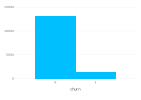

In [7]:
Gadfly.plot(trainingData, x = :churn, Geom.histogram, 
    Scale.x_discrete(levels=[0,1]), Scale.y_continuous(format=:plain))

There's a great amount imbalance in the target variable. We would be required to Oversample the minority class. 

In [8]:
trainingHasGas = countmap(trainingData.has_gas)

Dict{String, Int64} with 2 entries:
  "f" => 11955
  "t" => 2651

In [9]:
k = keys(trainingHasGas)

KeySet for a Dict{String, Int64} with 2 entries. Keys:
  "f"
  "t"

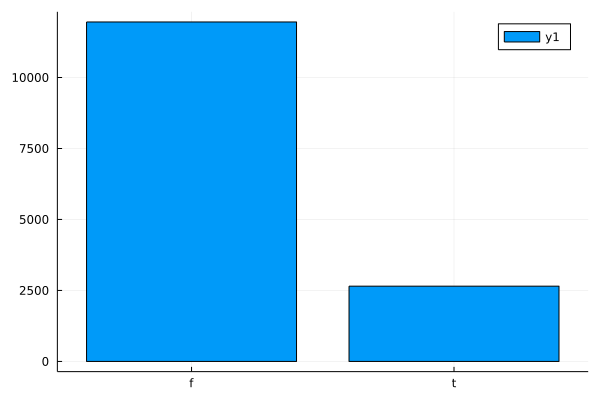

In [10]:
bar((x -> trainingHasGas[x]).(k),xticks=(1:2, k))

In [11]:
freqtable(trainingData.has_gas, trainingData.churn)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │     0      1
────────────┼─────────────
f           │ 10753   1202
t           │  2434    217

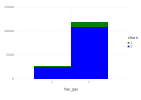

In [12]:
Gadfly.plot(trainingData, x = :has_gas, Geom.histogram, color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

In [13]:
freqtable(trainingData.channel_sales, trainingData.churn)

8×2 Named Matrix{Int64}
                     Dim1 ╲ Dim2 │    0     1
─────────────────────────────────┼───────────
MISSING                          │ 3442   283
epumfxlbckeskwekxbiuasklxalciiuu │    3     0
ewpakwlliwisiwduibdlfmalxowmwpci │  818    75
fixdbufsefwooaasfcxdxadsiekoceaa │    2     0
foosdfpfkusacimwkcsosbicdxkicaua │ 5934   820
lmkebamcaaclubfxadlmueccxoimlema │ 1740   103
sddiedcslfslkckwlfkdpoeeailfpeds │   11     0
usilxuppasemubllopkaafesmlibmsdf │ 1237   138

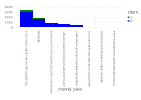

In [14]:
Gadfly.plot(trainingData, x= :channel_sales, Geom.histogram,
    color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

MISSING entry seems to have a significant amount of entries hence we can't just simply remove the values as missing values. We would be needed to contact our client for more details

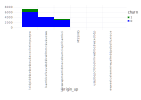

In [15]:
Gadfly.plot(trainingData, x= :origin_up, Geom.histogram,
    color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

In [16]:
freqtable(trainingData.origin_up, trainingData.churn)

6×2 Named Matrix{Int64}
                     Dim1 ╲ Dim2 │    0     1
─────────────────────────────────┼───────────
MISSING                          │   60     4
ewxeelcelemmiwuafmddpobolfuxioce │    1     0
kamkkxfxxuwbdslkwifmmcsiusiuosws │ 4036   258
ldkssxwpmemidmecebumciepifcamkci │ 2884   264
lxidpiddsbxsbosboudacockeimpuepw │ 6204   893
usapbepcfoloekilkwsdiboslwaxobdp │    2     0

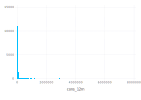

In [17]:
Gadfly.plot(trainingData, x= :cons_12m, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

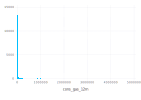

In [18]:
Gadfly.plot(trainingData, x= :cons_gas_12m, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

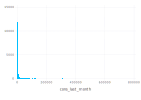

In [19]:
Gadfly.plot(trainingData, x= :cons_last_month, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

The Consumation data seems to be a skewed data. we would be required to transform these values

Let's try to get the Skewness of all the columns of the training dataframe. 

In [20]:
# get the numeric column in each dataframe. 

numColTrainData = select(trainingData, findall(col -> eltype(col) <: Number, eachcol(trainingData)))

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year
,Int64,Int64,Int64,Float64,Int64
1,0,54946,0,0.0,0
2,4660,0,0,189.95,0
3,544,0,0,47.96,0
4,1584,0,0,240.04,0
5,4425,0,526,445.75,526
6,8302,0,1998,796.94,1998
7,45097,0,0,8069.28,0
8,29552,0,1260,864.73,751
9,2962,0,0,444.38,0


In [21]:
# getting the skewness of each numeric values

skewnessValues = Dict()
for name in names(numColTrainData)
    skew = skewness(numColTrainData[name])
    push!(skewnessValues, name => skew)
end

In [22]:
skewnessValues

Dict{Any, Any} with 18 entries:
  :forecast_price_energy_peak     => -0.01433
  :forecast_price_energy_off_peak => -0.119574
  :cons_12m                       => 5.99669
  :margin_net_pow_ele             => 4.47287
  :cons_gas_12m                   => 9.59654
  :forecast_price_pow_off_peak    => -4.99826
  :cons_last_month                => 6.39075
  :churn                          => 2.72044
  :nb_prod_act                    => 8.63599
  :forecast_discount_energy       => 5.15457
  :imp_cons                       => 13.1974
  :forecast_cons_year             => 16.5863
  :pow_max                        => 5.78619
  :forecast_cons_12m              => 7.15512
  :forecast_meter_rent_12m        => 1.50499
  :margin_gross_pow_ele           => 4.47217
  :net_margin                     => 36.5658
  :num_years_antig                => 1.44607

The values seems to be heavily skewed, hence during the feature engineering we would be do the apporiate transformations. 

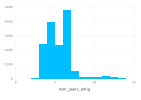

In [23]:
Gadfly.plot(trainingData, x= :num_years_antig, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

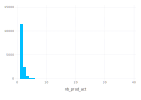

In [24]:
Gadfly.plot(trainingData, x= :nb_prod_act, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

### Hypothesis Testing 

In [25]:
names(pricingData)

8-element Vector{Symbol}:
 :id
 :price_date
 :price_off_peak_var
 :price_peak_var
 :price_mid_peak_var
 :price_off_peak_fix
 :price_peak_fix
 :price_mid_peak_fix

In [26]:
@pipe groupby(pricingData, [:id, :price_date]) |> combine(_ , findall(col -> eltype(col) <: Number, eachcol(pricingData)) .=> mean) 

,id,price_date,price_off_peak_var_mean,price_peak_var_mean
,String,Date,Float64,Float64
1,038af19179925da21a25619c5a24b745,"Date(""2015-01-01"")",0.151367,0.0
2,038af19179925da21a25619c5a24b745,"Date(""2015-02-01"")",0.151367,0.0
3,038af19179925da21a25619c5a24b745,"Date(""2015-03-01"")",0.151367,0.0
4,038af19179925da21a25619c5a24b745,"Date(""2015-04-01"")",0.149626,0.0
5,038af19179925da21a25619c5a24b745,"Date(""2015-05-01"")",0.149626,0.0
6,038af19179925da21a25619c5a24b745,"Date(""2015-06-01"")",0.149626,0.0
7,038af19179925da21a25619c5a24b745,"Date(""2015-07-01"")",0.150321,0.0
8,038af19179925da21a25619c5a24b745,"Date(""2015-08-01"")",0.145859,0.0
9,038af19179925da21a25619c5a24b745,"Date(""2015-09-01"")",0.145859,0.0


In [27]:
pricingData

,id,price_date,price_off_peak_var,price_peak_var
,String,Date,Float64,Float64
1,038af19179925da21a25619c5a24b745,"Date(""2015-01-01"")",0.151367,0.0
2,038af19179925da21a25619c5a24b745,"Date(""2015-02-01"")",0.151367,0.0
3,038af19179925da21a25619c5a24b745,"Date(""2015-03-01"")",0.151367,0.0
4,038af19179925da21a25619c5a24b745,"Date(""2015-04-01"")",0.149626,0.0
5,038af19179925da21a25619c5a24b745,"Date(""2015-05-01"")",0.149626,0.0
6,038af19179925da21a25619c5a24b745,"Date(""2015-06-01"")",0.149626,0.0
7,038af19179925da21a25619c5a24b745,"Date(""2015-07-01"")",0.150321,0.0
8,038af19179925da21a25619c5a24b745,"Date(""2015-08-01"")",0.145859,0.0
9,038af19179925da21a25619c5a24b745,"Date(""2015-09-01"")",0.145859,0.0


## Task 3. Feature Engineering & Feature Creation 

In [28]:
trainingData.LenCon = trainingData.date_end  - trainingData.date_activ
trainingData.LenCon = Dates.value.(trainingData.LenCon)

14606-element Vector{Int64}:
 1096
 2566
 2192
 2192
 2245
 1827
 1827
 2192
 1827
 2192
 1827
 2557
 1886
    ⋮
 1827
 2191
 1826
 1461
 2557
 2557
 1095
 1445
 1461
 1460
 1461
 2556

In [29]:
first(trainingData,5)

,id,channel_sales,cons_12m,cons_gas_12m
,String,String,Int64,Int64
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946
2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0
5,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0


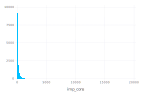

In [30]:
Gadfly.plot(trainingData, x= :imp_cons, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

In [31]:
trainingData.TotalCon = trainingData.cons_12m + trainingData.cons_gas_12m

14606-element Vector{Int64}:
   54946
    4660
     544
    1584
    4425
    8302
   45097
   29552
    2962
   26064
   10831
    4442
 1588988
       ⋮
    6694
   11563
    1097
    8310
    9441
   21199
   87146
   80210
    7223
    1844
     131
    8730

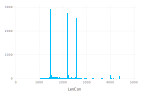

In [32]:
Gadfly.plot(trainingData, x= :LenCon, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

In [33]:
describe(trainingData.LenCon)

Summary Stats:
Length:         14606
Missing Count:  0
Mean:           2007.537587
Minimum:        731.000000
1st Quartile:   1461.000000
Median:         1828.500000
3rd Quartile:   2353.000000
Maximum:        4795.000000
Type:           Int64


In [34]:
@pipe groupby(trainingData, :churn) |> combine(_ ,:LenCon => mean) 

,churn,LenCon_mean
,Int64,Float64
1,1,1871.24
2,0,2022.2


In [35]:
first(pricingData,5)

,id,price_date,price_off_peak_var,price_peak_var
,String,Date,Float64,Float64
1,038af19179925da21a25619c5a24b745,"Date(""2015-01-01"")",0.151367,0.0
2,038af19179925da21a25619c5a24b745,"Date(""2015-02-01"")",0.151367,0.0
3,038af19179925da21a25619c5a24b745,"Date(""2015-03-01"")",0.151367,0.0
4,038af19179925da21a25619c5a24b745,"Date(""2015-04-01"")",0.149626,0.0
5,038af19179925da21a25619c5a24b745,"Date(""2015-05-01"")",0.149626,0.0
